In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pt

In [2]:
#Import dataset
df = pd.read_csv('height_weight.csv')

In [3]:
#Show first five rows
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
#Show last five rows
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
#Get number of rows,columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [6]:
df.shape

(3501, 2)

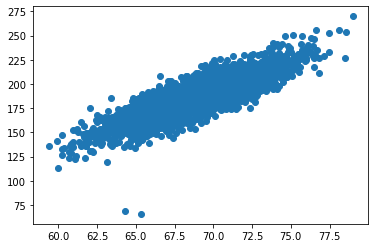

In [7]:
#Show height wise weight in graph (Height in x axis, weight in y axis)
pt.scatter(df['Height'],df['Weight'])

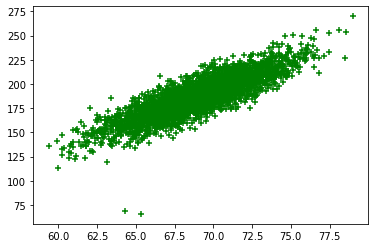

In [8]:
pt.scatter(df.Height,df.Weight,color = 'green', marker = '+')

Text(0.5, 1.0, 'Height wise Weight')

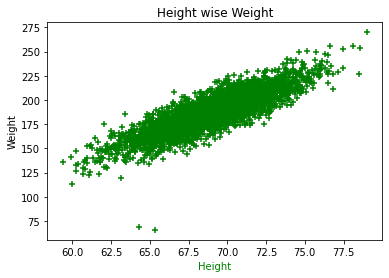

In [9]:
pt.scatter(df.Height, df.Weight, color='green', marker='+')
pt.xlabel('Height', color = 'green')
pt.ylabel('Weight', color = 'black')
pt.title('Height wise Weight')

In [10]:
#Calculate Height column mean and Weight column mean
df.Height.mean()

69.02441087268797

In [11]:
df.Weight.mean()

186.89125797946284

# Seperate dependent and independent variables

In [12]:
x = df[['Height']]
y = df['Weight']

In [13]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [14]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# Split the data set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30)

In [17]:
xtrain.head()

,Height
130,67.492193
2657,70.127887
2306,64.464550
2351,65.873234
212,72.394480


In [18]:
ytrain.head()

130     191.699605
2657    192.081131
2306    157.310481
2351    174.498556
212     208.436509
Name: Weight, dtype: float64

In [19]:
#Get number of train and test data
xtrain.shape

(2450, 1)

In [20]:
xtest.shape

(1051, 1)

# Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [24]:
reg.predict([[71.89]])

array([204.09290571])

In [25]:
#Get all dependent test values of all independent test values
ypred = reg.predict(xtest)
ypred

array([182.16476594, 218.82908526, 160.88472082, ..., 170.7932712 ,
       217.4416323 , 200.57979769])

In [26]:
#Mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest,ypred)

In [27]:
mse

103.99528628950469

In [28]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest,ypred)
mae

8.11586484065677

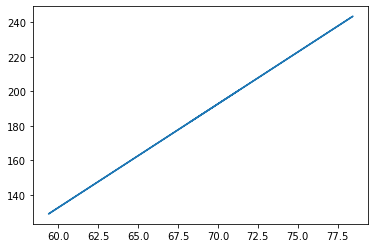

In [29]:
#Best fit line
pt.plot(xtest,reg.predict(xtest))

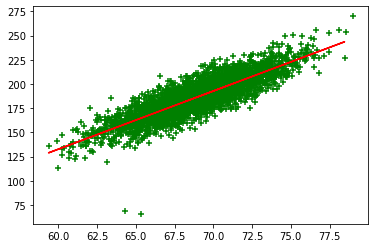

In [30]:
pt.scatter(df.Height,df.Weight,color='green',marker = '+')
pt.plot(xtest,reg.predict(xtest),color='red')

In [31]:
#Testing Accuracy
reg.score(xtest,ytest)

0.7289003337129297

In [32]:
reg.score(xtrain,ytrain)

0.7336880484867444

# Save Model

In [33]:
import pickle as pk

In [35]:
pk.dump(reg, open('reg1','wb')) # Write Binary

In [36]:
reg1 = pk.load(open('reg1','rb'))

In [41]:
reg1

LinearRegression()

In [40]:
reg1.predict([[67]])

array([174.69102538])